Hi,

We have in our hand the very most wanted dataset to drive the APP Industry to **develop more and more engaging apps**. I am personally looking to see some very important results which could be driving the current generation youth.  
You all might have seen the **Social Dilemma**, the documentary which tells us about how we are loosing our control over ourself. The one thing i agree on is, **if you don't pay for the product and use it free, YOU ARE THE PRODUCT**.  

Our aim is to solve the below challenges, generate some of our own questions and later with the **reviews** data, we would like to cross check out top 5 apps, obtained from the EDA of our app data.  
#### Challenges:
- Top 5 apps with the **highest installs** with **Everyone** content rating. Subsequently, look at the ratings obtained by them.  
- Top 3 APPS in each category by RATING.
- Paid vs Free Top 5 apps with highest ratings. Further drill down to the apps with highest installs to sort them.
- Free vs Paid ration of Subscription. **Here, SUBSCRIPTION is an arbitrary column generated**. The inference obtained from this will be explained.  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
summary_data = pd.read_csv('googleplaystore.csv')
reviews_data = pd.read_csv('googleplaystore_user_reviews.csv')

# Let's do some DATA Formalitites
summary_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
print('Shape of summary data:', summary_data.shape)
print('--------------------------------------------')
print('Columns in our summary of data: ',summary_data.columns)
print('--------------------------------------------')
print(summary_data.info())
print('--------------------------------------------')
print('Total Unique APPS in the data: ',summary_data.App.nunique())
print('--------------------------------------------')
print('Total Unique Categories: ',summary_data.Category.nunique())
print('--------------------------------------------')
print('Total Unique Genres: ',summary_data.Genres.nunique())
print('--------------------------------------------')
print('Total Unique Content Ratings: ',summary_data['Content Rating'].nunique())
print('--------------------------------------------')
print("Let's see the distribution of Content Ratings: ")
print(summary_data['Content Rating'].value_counts())

Shape of summary data: (10841, 13)
--------------------------------------------
Columns in our summary of data:  Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1)

Now we know that Unrated has 2 entries, then instead of looking for top 5 apps, we will be looking at top 3 APPS now. Also, let's drop those entries directly which have missing data in either of the columns

In [4]:
summary_data = summary_data.dropna(axis='rows')
summary_data = summary_data.drop_duplicates(subset=['App'])
summary_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 13 columns):
App               8190 non-null object
Category          8190 non-null object
Rating            8190 non-null float64
Reviews           8190 non-null object
Size              8190 non-null object
Installs          8190 non-null object
Type              8190 non-null object
Price             8190 non-null object
Content Rating    8190 non-null object
Genres            8190 non-null object
Last Updated      8190 non-null object
Current Ver       8190 non-null object
Android Ver       8190 non-null object
dtypes: float64(1), object(12)
memory usage: 895.8+ KB


In [5]:
# Installs like 1000+,50,000,000+ doesn't looks good, as we can't compare strings properly on a logical manner. So we remove the +

def remove_plus_add_underscore(summary_data):
    summary_data['Installs'] = summary_data['Installs'].str.replace(',','')
    summary_data['Installs'] = summary_data['Installs'].str.replace('+','')
    summary_data['Content Rating'] = summary_data['Content Rating'].str.replace('+','')
    summary_data['Content Rating'] = summary_data['Content Rating'].str.replace(' ','_')
    summary_data['Installs'] = summary_data['Installs'].astype('int')
    return summary_data

copy_summary_data = remove_plus_add_underscore(summary_data)
copy_summary_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# let's look for apps developed for everyone
def look_for_content(df,content_rating_type):
    return_df = df[df['Content Rating'] == content_rating_type].sort_values(by = 'Installs',ascending = False).head(5)
    return_df = return_df.sort_values(by = 'Rating',ascending = False).head(5).reset_index(drop=True)
    return return_df

In [7]:
for i in copy_summary_data['Content Rating'].unique():
    globals()['content_rating_%s' % i] = look_for_content(copy_summary_data,i)

In [8]:
content_rating_Everyone

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Google,TOOLS,4.4,8033493,Varies with device,1000000000,Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
1,Google Drive,PRODUCTIVITY,4.4,2731171,Varies with device,1000000000,Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
2,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
4,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,1000000000,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device


In [9]:
content_rating_namelist = ['content_rating_Adults_only_18','content_rating_Everyone','content_rating_Everyone_10','content_rating_Mature_17',
                      'content_rating_Teen','content_rating_Unrated']
content_rating_list = [content_rating_Adults_only_18,content_rating_Everyone,content_rating_Everyone_10,content_rating_Mature_17,
                      content_rating_Teen,content_rating_Unrated]
for i,j in zip(content_rating_namelist,content_rating_list):
        print('Top 3 Apps in :',i)
        print(j.App[:3].values,j.Rating[:3].values)

Top 3 Apps in : content_rating_Adults_only_18
['Manga Master - Best manga & comic reader'
 'DraftKings - Daily Fantasy Sports' 'Manga Books'] [4.6 4.5 3.8]
Top 3 Apps in : content_rating_Everyone
['Google' 'Google Drive' 'WhatsApp Messenger'] [4.4 4.4 4.4]
Top 3 Apps in : content_rating_Everyone_10
['Clash Royale' 'Subway Surfers'
 'Minion Rush: Despicable Me Official Game'] [4.6 4.5 4.5]
Top 3 Apps in : content_rating_Mature_17
['Sniper 3D Gun Shooter: Free Shooting Games - FPS'
 'Z Camera - Photo Editor, Beauty Selfie, Collage' 'Twitter'] [4.6 4.4 4.3]
Top 3 Apps in : content_rating_Teen
['Instagram' 'Google Play Games' 'Facebook'] [4.5 4.3 4.1]
Top 3 Apps in : content_rating_Unrated
['DC Universe Online Map'] [4.1]


#### Point 1 and 2:  

Category: Adult 18+:
- 'Manga Master - Best manga & comic reader',
- 'DraftKings - Daily Fantasy Sports',
- 'Manga Books'  

Category: Everyone
- 'Google',
- 'Google Chrome: Fast & Secure',
- 'Maps - Navigate & Explore' 

Category: Everyone 10+
- Subway Surfers

Category: Mature 17+
- 'Sniper 3D Gun Shooter: Free Shooting Games - FPS',
- 'Z Camera - Photo Editor, Beauty Selfie, Collage',
- 'Twitter'

Category: Teen
- 'Instagram',
- 'YouTube',
- 'Google Play Games'  

Instagram has a rating of 4.5 which makes it more valuable and more usable than Facebook/Youtube at this moment. So if a company is looking to advertise their  **brands/products**, the top 3 apps to look for are:  
- Manga Master
- Sniper 3D Gun Shooter
- Instagram  


Let's look on point: 
- Paid vs Free Top 5 apps with highest ratings. 

In [10]:
def paid_vs_free(df):
    paid_apps = df[df.Type == 'Paid'].sort_values(by = 'Rating',ascending = False).reset_index().head(5)
    free_apps = df[df.Type == 'Free'].sort_values(by = 'Rating',ascending = False).reset_index().head(5)
    paid_apps_info = paid_apps.set_index(paid_apps.App).to_dict()['Rating']
    free_apps_info = paid_apps.set_index(free_apps.App).to_dict()['Rating']
    return paid_apps_info,free_apps_info

In [11]:
print('Paid vs Free: ',paid_vs_free(copy_summary_data))

Paid vs Free:  ({'FHR 5-Tier 2.0': 5.0, 'Ra Ga Ba': 5.0, "Hey AJ! It's Saturday!": 5.0, "Hey AJ! It's Bedtime!": 5.0, "Santa's Monster Shootout DX": 5.0}, {'DG TV': 5.0, "CJ's Coffee Cafe": 5.0, 'ES Billing System (Offline App)': 5.0, 'CJ the REALTOR': 5.0, 'American Girls Mobile Numbers': 5.0})


Now we know that there are 5 such TOP apps in both the Paid/Free type. Let's sort them on installs and then look again at the top values.  
This would solve our objective number 3.

In [12]:
# Let's look at other details for sure of these apps after sorting out
paid_apps = copy_summary_data[copy_summary_data.Type == 'Paid'].sort_values(by = 'Rating',ascending = False).reset_index().head(5)
paid_apps = paid_apps.sort_values(by = 'Installs',ascending = False).reset_index(drop=True).drop(columns = 'index')
paid_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,FHR 5-Tier 2.0,MEDICAL,5.0,2,1.2M,500,Paid,$2.99,Everyone,Medical,"December 16, 2015",1.0,4.0 and up
1,Hey AJ! It's Saturday!,BOOKS_AND_REFERENCE,5.0,12,50M,100,Paid,$3.99,Everyone,Books & Reference,"June 13, 2016",1.0.0,2.2 and up
2,Santa's Monster Shootout DX,GAME,5.0,4,33M,50,Paid,$1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up
3,Hey AJ! It's Bedtime!,FAMILY,5.0,1,63M,10,Paid,$4.99,Everyone,Education,"April 4, 2018",1.0.59,2.3 and up
4,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up


In [13]:
free_apps = copy_summary_data[copy_summary_data.Type == 'Free'].sort_values(by = 'Rating',ascending = False).reset_index().head(5)
free_apps = free_apps.sort_values(by = 'Installs',ascending = False).reset_index(drop=True).drop(columns = 'index')
free_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,American Girls Mobile Numbers,DATING,5.0,5,4.4M,1000,Free,0,Mature_17,Dating,"July 17, 2018",3.0,4.0.3 and up
1,CJ's Coffee Cafe,TRAVEL_AND_LOCAL,5.0,6,2.4M,500,Free,0,Everyone,Travel & Local,"August 21, 2017",7.5.0,4.0.3 and up
2,DG TV,NEWS_AND_MAGAZINES,5.0,3,5.7M,100,Free,0,Everyone,News & Magazines,"May 26, 2018",1.2,4.1 and up
3,ES Billing System (Offline App),PRODUCTIVITY,5.0,1,4.2M,100,Free,0,Everyone,Productivity,"May 17, 2018",1.0,4.1 and up
4,CJ the REALTOR,BUSINESS,5.0,1,4.2M,10,Free,0,Everyone,Business,"May 31, 2017",1.0.8,4.0.3 and up


In [14]:
paid_and_free = pd.concat([paid_apps,free_apps]).reset_index(drop=True)
paid_and_free

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,FHR 5-Tier 2.0,MEDICAL,5.0,2,1.2M,500,Paid,$2.99,Everyone,Medical,"December 16, 2015",1.0,4.0 and up
1,Hey AJ! It's Saturday!,BOOKS_AND_REFERENCE,5.0,12,50M,100,Paid,$3.99,Everyone,Books & Reference,"June 13, 2016",1.0.0,2.2 and up
2,Santa's Monster Shootout DX,GAME,5.0,4,33M,50,Paid,$1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up
3,Hey AJ! It's Bedtime!,FAMILY,5.0,1,63M,10,Paid,$4.99,Everyone,Education,"April 4, 2018",1.0.59,2.3 and up
4,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
5,American Girls Mobile Numbers,DATING,5.0,5,4.4M,1000,Free,0,Mature_17,Dating,"July 17, 2018",3.0,4.0.3 and up
6,CJ's Coffee Cafe,TRAVEL_AND_LOCAL,5.0,6,2.4M,500,Free,0,Everyone,Travel & Local,"August 21, 2017",7.5.0,4.0.3 and up
7,DG TV,NEWS_AND_MAGAZINES,5.0,3,5.7M,100,Free,0,Everyone,News & Magazines,"May 26, 2018",1.2,4.1 and up
8,ES Billing System (Offline App),PRODUCTIVITY,5.0,1,4.2M,100,Free,0,Everyone,Productivity,"May 17, 2018",1.0,4.1 and up
9,CJ the REALTOR,BUSINESS,5.0,1,4.2M,10,Free,0,Everyone,Business,"May 31, 2017",1.0.8,4.0.3 and up


#### Point 3:  

I can clearly see, that the free applications have more **Installs** than **Paid** applications. So, if we advertise something over the free applications, we have more chance of reaching a greater audience.


In [15]:
labels = ['Paid','Free']
installs = [paid_and_free.groupby('Type').get_group('Paid')['Installs'].sum(),paid_and_free.groupby('Type').get_group('Free')['Installs'].sum()]
explode = (0,0.2)

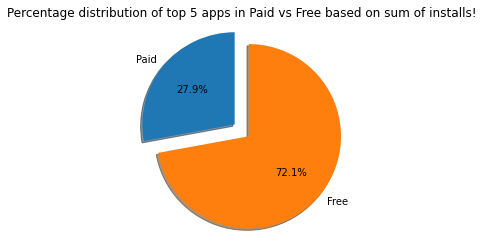

In [16]:
fig1,ax1 = plt.subplots()
ax1.pie(installs,explode = explode,labels = labels,autopct = '%1.1f%%',shadow = True,startangle = 90)
ax1.axis('equal')
plt.title('Percentage distribution of top 5 apps in Paid vs Free based on sum of installs!')
plt.show()

I just thought, let's plot the same plot for the whole data, let's see if we get something interesting.

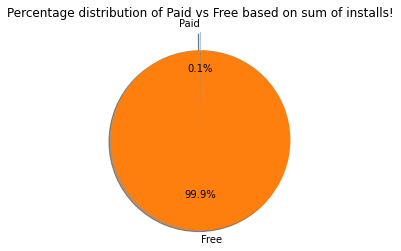

In [17]:
labels = ['Paid','Free']
installs = [copy_summary_data.groupby('Type').get_group('Paid')['Installs'].sum(),copy_summary_data.groupby('Type').get_group('Free')['Installs'].sum()]
explode = (0,0.2)
fig1,ax1 = plt.subplots()
ax1.pie(installs,explode = explode,labels = labels,autopct = '%1.1f%%',shadow = True,startangle = 90)
ax1.axis('equal')
plt.title('Percentage distribution of Paid vs Free based on sum of installs!')
plt.show()

So, this is weird, this means that from the whole data, we see that PAID apps are not making much of an impact or influencing the users. I am not sure, how much we can rely on this inference, but sure about the inference we obtained from the TOP 5 Paid vs Free apps inference.  
This EDA will be definitely helping the people who are in the business of MARKETING as they look to expand and reach greater audience.  

#### Point 4:  

Now this is an interesting task, which we'll be doing. This is an IDEA suggested by my younger sister, who asked me that the apps which are actually free tends to have **SUBSCRIPTION** facilities for more features, like **CLASH OF CLANS, MEDIUM** for instance which i play a lot. SO, she wanted to identify, the ratio/proportion/distributioon of such apps in FREE and PAID Categories, and then look for the apps with highest ratings.  

This would imply that if an app **X** is free but has option of subscription and has the highest rating also along with installs, that means that the app has a greater reach and users are willing to pay for subscription for some exclusive features.

So, here we donot have a **SUBSCRIPTION** column, so we will build a random generated binary column with **1 -> subscription, 0 -> No subscription** and then do our analysis.  
This would help us, that if somehow we get **original/raw subscription** column somehow, this would change the game of advertising. As there, we can lure some of our customers with the feature of subscription.  

Let's see how this works out!

In [18]:
# Creating a random binary column
copy_summary_data['Subscription'] = np.random.randint(0,2,size = len(copy_summary_data))
copy_summary_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Subscription
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1


In [19]:
copy_summary_data.Subscription.value_counts()

0    4135
1    4055
Name: Subscription, dtype: int64

In [20]:
paid_subscribe = copy_summary_data.loc[(copy_summary_data.Type == 'Paid') & (copy_summary_data.Subscription == 1)].sort_values(by='Installs',ascending=False).reset_index(drop=True)
free_subscribe = copy_summary_data.loc[(copy_summary_data.Type == 'Free') & (copy_summary_data.Subscription == 1)].sort_values(by='Installs',ascending=False).reset_index(drop=True)

In [21]:
paid_subscribe.sort_values(by = 'Rating',ascending = False).reset_index().head(5)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Subscription
0,294,211:CK,GAME,5.0,8,38M,10,Paid,$0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up,1
1,290,DL Image Manager,PRODUCTIVITY,5.0,2,1.7M,10,Paid,$0.99,Everyone,Productivity,"July 29, 2018",1.0.5,4.0 and up,1
2,282,BC MVA Fines,BOOKS_AND_REFERENCE,5.0,5,7.2M,50,Paid,$1.75,Everyone,Books & Reference,"October 8, 2015",1.0,4.1 and up,1
3,239,FHR 5-Tier 2.0,MEDICAL,5.0,2,1.2M,500,Paid,$2.99,Everyone,Medical,"December 16, 2015",1.0,4.0 and up,1
4,272,RETRO Shocked DW-6000,PERSONALIZATION,5.0,13,500k,100,Paid,$1.49,Everyone,Personalization,"April 4, 2017",1.2,2.3 and up,1


In [22]:
free_subscribe.sort_values(by = 'Rating',ascending = False).reset_index().head(5)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Subscription
0,3613,BI APP,FINANCE,5.0,2,2.7M,100,Free,0,Everyone,Finance,"February 19, 2016",1.8,4.0 and up,1
1,3689,Online Girls Chat Group,DATING,5.0,5,5.0M,100,Free,0,Mature_17,Dating,"August 2, 2018",8.2,4.0.3 and up,1
2,3569,Selfie With Champion AJ Style,PHOTOGRAPHY,5.0,2,7.5M,500,Free,0,Everyone,Photography,"January 8, 2018",1.0,3.2 and up,1
3,3572,SUMMER SONIC app,EVENTS,5.0,4,61M,500,Free,0,Everyone,Events,"July 24, 2018",1.0,4.4 and up,1
4,3247,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9M,1000,Free,0,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.4 and up,1


One thing which is very clear that the APPS which might have install and review rating as 5.0 doesn't helps our business. Hence we fix that: **sort by INSTALLS and then pick the TOP 5 APPS**, see their Rating and we can decide the next R&D for an APP to be developed.

In [23]:
# Again we combine them:
paid_and_free_subscribe = pd.concat([paid_subscribe.head(5),free_subscribe.head(5)]).reset_index(drop=True)
paid_and_free_subscribe

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Subscription
0,Card Wars - Adventure Time,FAMILY,4.3,129603,23M,1000000,Paid,$2.99,Everyone_10,Card;Action & Adventure,"February 11, 2016",1.11.0,2.3.3 and up,1
1,DraStic DS Emulator,GAME,4.6,87766,12M,1000000,Paid,$4.99,Everyone,Action,"July 19, 2016",r2.5.0.3a,2.3 and up,1
2,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14M,1000000,Paid,$2.49,Everyone,Personalization,"August 24, 2016",5.7.8,2.3 and up,1
3,Cut the Rope GOLD,FAMILY,4.6,61264,43M,1000000,Paid,$0.99,Everyone,Puzzle,"June 19, 2018",3.7.0,4.1 and up,1
4,Tasker,TOOLS,4.6,43045,Varies with device,1000000,Paid,$2.99,Everyone,Tools,"June 25, 2018",Varies with device,Varies with device,1
5,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0,Everyone_10,Arcade,"July 12, 2018",1.90.0,4.1 and up,1
6,Google,TOOLS,4.4,8033493,Varies with device,1000000000,Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device,1
7,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,Varies with device,1000000000,Free,0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device,1
8,Google News,NEWS_AND_MAGAZINES,3.9,877635,13M,1000000000,Free,0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up,1
9,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1


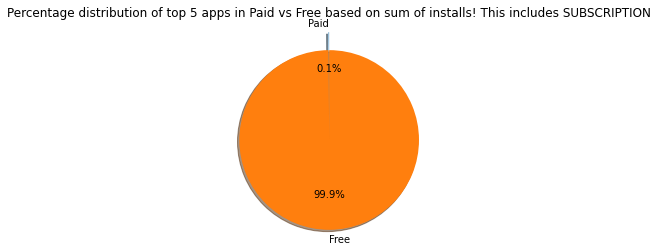

In [24]:
labels = ['Paid','Free']
installs = [paid_and_free_subscribe.groupby('Type').get_group('Paid')['Installs'].sum(),paid_and_free_subscribe.groupby('Type').get_group('Free')['Installs'].sum()]
explode = (0,0.2)
fig1,ax1 = plt.subplots()
ax1.pie(installs,explode = explode,labels = labels,autopct = '%1.1f%%',shadow = True,startangle = 90)
ax1.axis('equal')
plt.title('Percentage distribution of top 5 apps in Paid vs Free based on sum of installs! This includes SUBSCRIPTION')
plt.show()

So, here what we can deduce is that **If we assume our subscription column to be holding TRUE values, then the free apps with subscription facilities dominate heavily in the market**.  
Apps like **Google Photos** and **Subway Surfers** domainate heavily the installs and hence the product can be brought to a greater audience using these 2 apps.  


#### Challenges at some rule-based scenarios:  
- Look for APPS with **Rating > 4.5** and see the distribution of the Category column. This will give us the fair bit of idea as what kind of APPS are more likely to succeed. Even we can look at their SIZES/GENRES and Type.  
- Find all the apps in GAME category and look for the APP with the highest number of Installs. We will use this APP as one of the APPS for finding reviews.  
- Five Apps picked till now:  
    - Where's My Water?		
    - Gmail		
    - Five Nights at Freddy's		
    - Messenger – Text and Video Chat for Free	
    - Subway Surfers  

In [25]:
rating_greater_4_point_5 = copy_summary_data[copy_summary_data.Rating >=4.5].sort_values(by = 'Installs',ascending=False).reset_index(drop=True)
rating_greater_4_point_5_games = rating_greater_4_point_5[rating_greater_4_point_5.Category == 'GAME'].reset_index(drop=True)
rating_greater_4_point_5_games.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Subscription
0,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0,Everyone_10,Arcade,"July 12, 2018",1.90.0,4.1 and up,1
1,My Talking Tom,GAME,4.5,14891223,Varies with device,500000000,Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up,0
2,Score! Hero,GAME,4.6,5418675,96M,100000000,Free,0,Everyone,Sports,"June 13, 2018",1.751,4.4 and up,0
3,Sniper 3D Gun Shooter: Free Shooting Games - FPS,GAME,4.6,7671249,Varies with device,100000000,Free,0,Mature_17,Action,"August 2, 2018",Varies with device,Varies with device,1
4,Cooking Fever,GAME,4.5,3197865,82M,100000000,Free,0,Everyone,Arcade,"July 12, 2018",2.8.0,4.0.3 and up,1


- 3 More apps just related to gaming:  
    - My Talking Tom  
    - Score! Hero (I play this game!😛)  
    - Cooking Fever
    
- Note: **Due to running notebook again and again, our Subscription column will keep variating, so that's why already fixed the apps from the first run.**

In [45]:
# Apps to look for as suggested by colleagues
apps_to_look_for = ['Google Pay','PUBG MOBILE','PayPal','Ludo Family Dice Game','Amazon Shopping']
df = pd.DataFrame(columns=copy_summary_data.columns.to_list())
ready_df = pd.DataFrame(columns=copy_summary_data.columns.to_list())
for i in apps_to_look_for:
    df = copy_summary_data[copy_summary_data.App == i]
    ready_df = pd.concat([ready_df,df]).reset_index(drop=True)


In [46]:
ready_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Subscription
0,Google Pay,FINANCE,4.2,347838,Varies with device,100000000,Free,0,Everyone,Finance,"July 26, 2018",2.70.206190089,Varies with device,0
1,PUBG MOBILE,GAME,4.4,3715656,36M,50000000,Free,0,Teen,Action,"July 24, 2018",0.7.0,4.3 and up,1
2,PayPal,FINANCE,4.3,659741,47M,50000000,Free,0,Everyone,Finance,"July 18, 2018",6.28.0,4.4 and up,0
3,Ludo Family Dice Game,FAMILY,4.2,3593,19M,500000,Free,0,Everyone,Board;Brain Games,"March 7, 2018",1.4,4.1 and up,0
4,Amazon Shopping,SHOPPING,4.3,909226,42M,100000000,Free,0,Teen,Shopping,"July 31, 2018",16.14.0.100,4.4 and up,0


These apps are suggested by my peers to look for and provide some insights